In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/SUPRITH KS/Documents/Visual Studio/Projects/twitterf-main/data/twitter_dataset.csv')
data.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.600000,195,19,53,58,0,0
1,0.705882,9,67,555,2,1,0
2,0.916667,20,21,267,0,0,1
3,0.500000,28,16,325,0,0,1
4,0.733333,45,20,515,0,0,1


In [3]:
features=[]
for attributes in data.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [4]:
# Extract features and labels
X = data[features]
y = data.label

In [5]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Define the base models
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
nb = GaussianNB()
nn = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42, max_iter=1000)

meta = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', random_state=42, max_iter=1000)



In [7]:
# Define the stacking classifier
estimators = [('dt', dt), ('nb', nb), ('nn', nn)]
stacking = StackingClassifier(estimators=estimators, final_estimator=meta)

In [8]:
# Train the stacking classifier
train_sizes, train_scores, test_scores = learning_curve(estimator=stacking, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

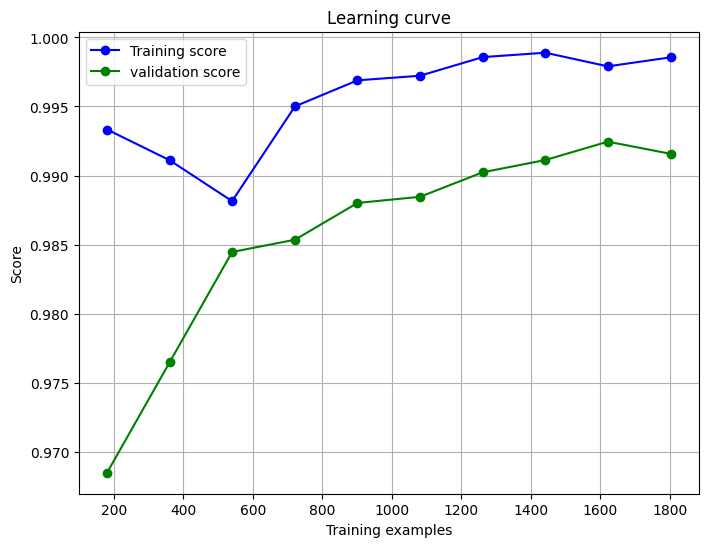

In [9]:
# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='green', label='validation score')
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()
plt.legend(loc='best')
plt.show()